In [1]:
import os, sys
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

# Import utility functions and classes
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils import *

# ggplot style
plt.style.use('ggplot')

In [2]:
fields = ['Rx', 'Ry', 'Rz', 'Tx', 'Ty', 'Tz']

In [3]:
# Load the MoCap dataset
loader = MoCapLoader(normalized=False)
X, _ = loader.load(fields)
concatenated = np.concatenate(X)

In [14]:
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    rho = '\u03C1'
    ax.annotate('{} = {:.2f}'.format(rho, r), xy=(.35, .9), xycoords=ax.transAxes)
    
def add_subplot_border(ax, width=1, color=None ):
    fig = ax.get_figure()

    # Convert bottom-left and top-right to display coordinates
    x0, y0 = ax.transAxes.transform((0, 0))
    x1, y1 = ax.transAxes.transform((1, 1))

    # Convert back to Axes coordinates
    x0, y0 = ax.transAxes.inverted().transform((x0, y0))
    x1, y1 = ax.transAxes.inverted().transform((x1, y1))

    rect = plt.Rectangle(
        (x0, y0), x1-x0, y1-y0,
        color=color,
        transform=ax.transAxes,
        zorder=-1,
        lw=2*width+1,
        fill=None,
    )
    fig.patches.append(rect)

In [15]:
corr_df = pd.DataFrame(concatenated, columns=fields)

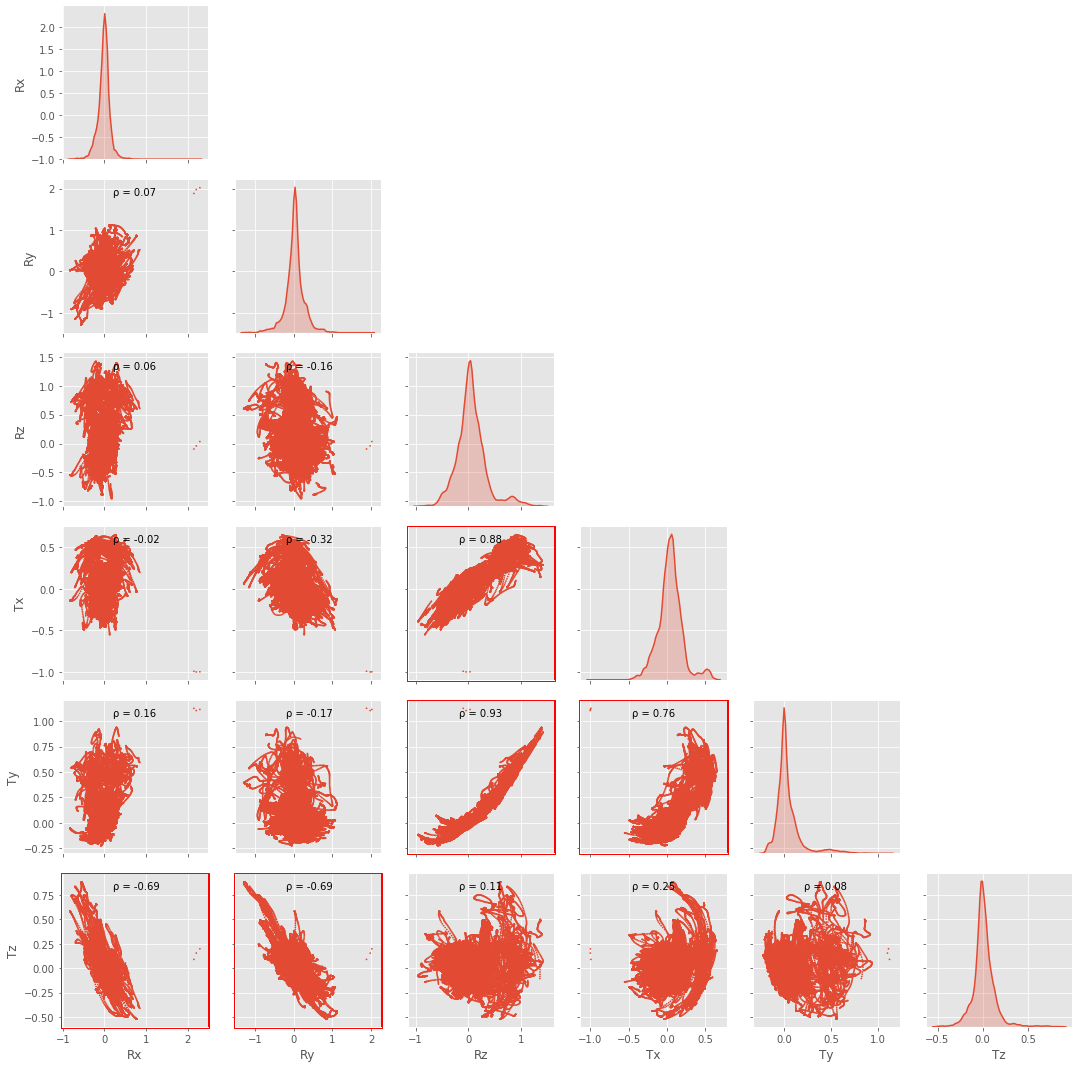

In [16]:
g = sns.pairplot(corr_df, diag_kind='kde', plot_kws={'s': 3, 'edgecolor': 'none'})
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
for i, j in zip(*np.tril_indices_from(g.axes)):
    if (i, j) in [(3, 2), (4, 2), (4, 3), (5, 0), (5, 1)]:
        add_subplot_border(g.axes[i, j], 1, 'red')
g.map_lower(corrfunc)
plt.show()

In [17]:
corr_df = pd.DataFrame(concatenated[:, [0, 1, 2]], columns=[f for f in fields if f not in ['Tx', 'Ty', 'Tz']])

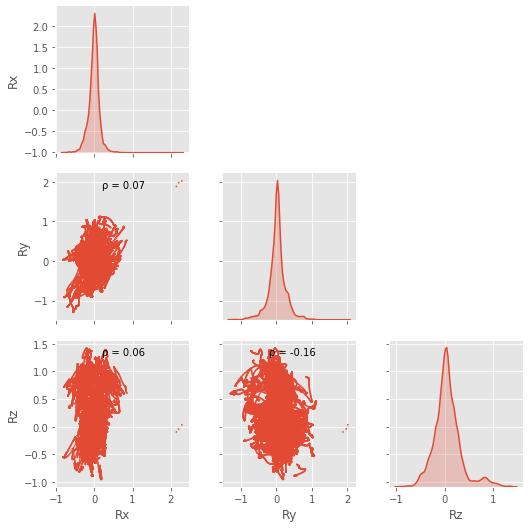

In [18]:
g = sns.pairplot(corr_df, diag_kind='kde', plot_kws={'s': 3, 'edgecolor': 'none'})
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
g.map_lower(corrfunc)
plt.show()